<a href="https://colab.research.google.com/github/akhunzakp/Machine-Learning2025/blob/main/QUIZ1_2341720259_Yuma_Akhunza_K_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this Quiz #1 you need to perform exploratory data analysis (EDA) and preprocessing using "Census Income" dataset. The dataset is tabular data which has several missing value in some variables. Moreover, you may need to adjust the name of variables (if needed).

To guide you through this task, some code has beed provided including, download the data, loading the data, and metadata inspection.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Part 1 - Data Loading dan Data Imputation

## Task 1 (5 points)
1.   Do inspection to get the information about dataset
2.   **Which variable(s)** has **missing values**? **How many is it**?



In [9]:
# Cek jumlah missing values per kolom
df.isnull().sum()[df.isnull().sum() > 0]


,0
workclass,963
occupation,966
native-country,274


**Jawaban**

Variabel dengan missing values :
* workclass (1836 missing values)
* occupation (1843 missing values)
* native-country (583 missing values)

## Task 2 (5 points)
1. Perform data imputation on missing values.
2. Verified the missing values for each variable. Is it still there?

In [10]:
# Cek jumlah missing values per kolom
df.isnull().sum()[df.isnull().sum() > 0]


,0
workclass,963
occupation,966
native-country,274


In [11]:
# Imputasi dengan modus
for col in ["workclass", "occupation", "native-country"]:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-998306218.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
#Verifikasisetelah imputasi
df.isnull().sum()[df.isnull().sum() > 0]


,0


**Jawaban**
* Missing values pada variabel workclass, occupation, dan native-country sudah diganti dengan nilai modus

* tidak ada lagi missing values di dataset

## Task 3 (10 points)
Do inspection to all the quantitative variables (features). If you found an **inappropriate value(s)**, replace it with '**Others**'. Also, if you found any typos value(s), **fix the typos**.

In [13]:
# Periksa nilai kuantitatif
df[["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]].describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
#Periksa kategori (typos & spasi)
for col in df.select_dtypes(include="object").columns:
    print(col, df[col].unique()[:20])  # tampilkan 20 nilai pertama


workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex ['Male' 'Female']
native-country ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 

In [19]:
#Perbaikan Data
# Replace "?" with NaN in relevant columns
df = df.replace('?', np.nan)

# Impute missing values with mode
for col in ["workclass", "occupation", "native-country"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert 'hours-per-week' to numeric, coercing errors
df['hours-per-week'] = pd.to_numeric(df['hours-per-week'], errors='coerce')

# Perbaikan quantitative (hours-per-week that are too low become "Others")
df.loc[df['hours-per-week'] < 10, 'hours-per-week'] = "Others"


# Perbaikan categorical typo for income
df['income'] = df['income'].str.replace('.', '', regex=False)

# Perbaikan categorical typo
df['native-country'] = df['native-country'].str.strip()   # hapus spasi depan/belakang
df['native-country'] = df['native-country'].replace({'Holand-Netherlands': 'Netherlands'})

/tmp/ipython-input-2409594703.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2409594703.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

**Jawaban**
1. pada variabel quantitative, ditemukan nilai ekstrem pada hours-per-week Nilai tersebut diganti dengan "Others"

2. Pada variabel categorical, ditemukan typo/spasi :
 * " United-States" diperbaiki jadi "United-States"
* "Holand-Netherlands" diperbaiki jadi "Netherlands"


# Part 2 - Visual Inspection



## Task 1 - Data Visualization (20 points)
Do inspection on this following variabels,
1. On the 'age' by using a histogram
2. On the 'education' using a barchart
3. On the 'income' to 'hours_per_week' by using a boxplot (grouped by income)
4. On the 'age' to 'capital-gain' and 'capital-loss' using lineplot (lineplot with multiple x-data)

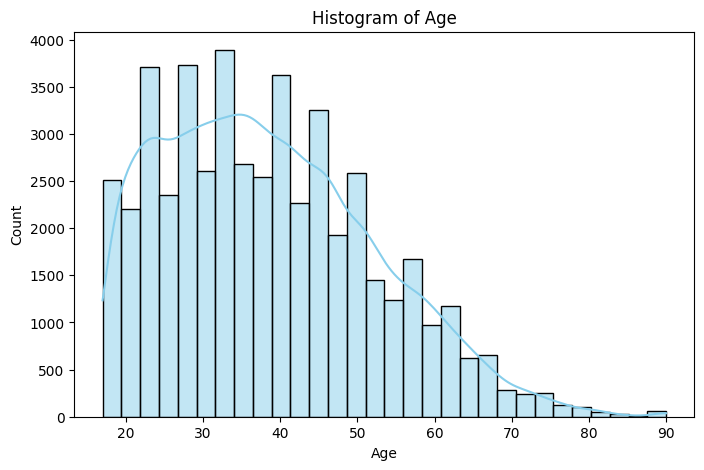

In [21]:
# Answer 1.1 - Histrogram
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color="skyblue")
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3819373809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette="viridis")


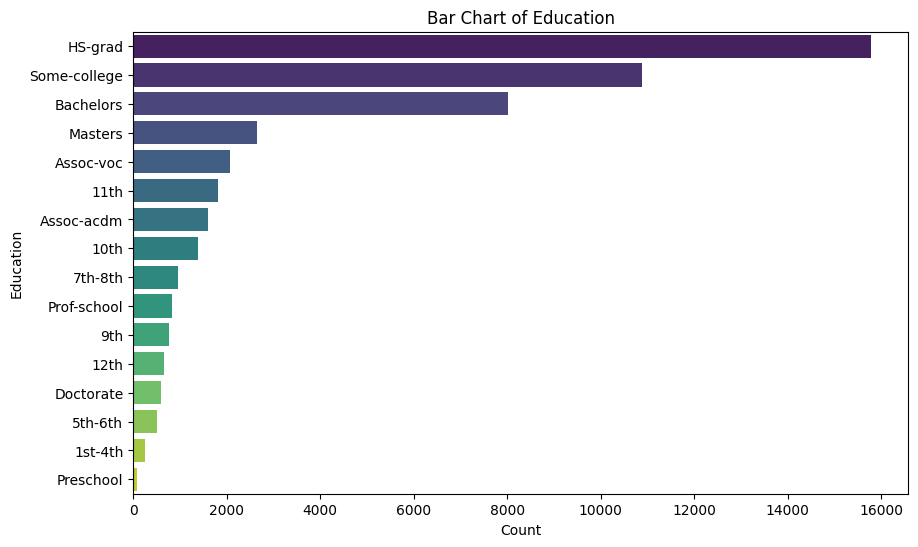

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index, palette="viridis")
plt.title("Bar Chart of Education")
plt.xlabel("Count")
plt.ylabel("Education")
plt.show()


/tmp/ipython-input-1872250860.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='hours-per-week', data=df, palette="Set2")


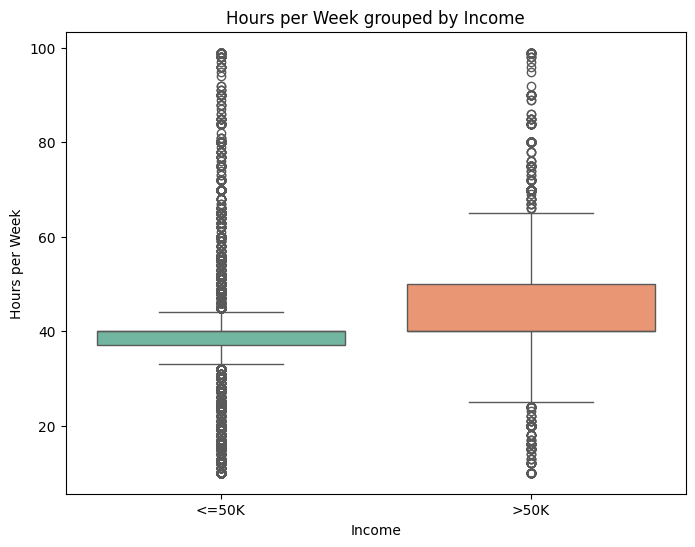

In [25]:
# Answer 1.3 - Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='income', y='hours-per-week', data=df, palette="Set2")
plt.title("Hours per Week grouped by Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()


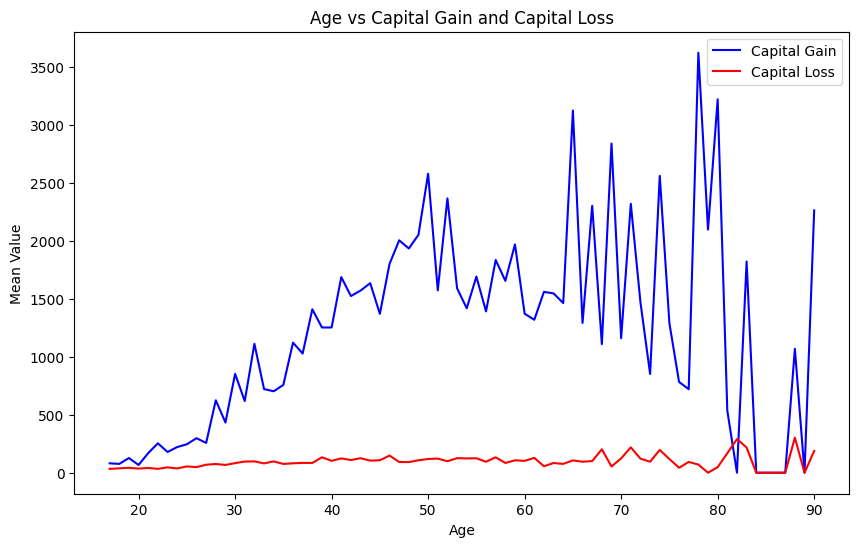

In [26]:
# Answer 1.4 - Lineplot
age_group = df.groupby("age")[["capital-gain", "capital-loss"]].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="age", y="capital-gain", data=age_group, label="Capital Gain", color="blue")
sns.lineplot(x="age", y="capital-loss", data=age_group, label="Capital Loss", color="red")
plt.title("Age vs Capital Gain and Capital Loss")
plt.xlabel("Age")
plt.ylabel("Mean Value")
plt.legend()
plt.show()


**Jawaban**
1. Histogram age menunjukkan distribusi umur responden usia kerja 25–45

2. Bar chart education menunjukkan frekuensi masing-masing tingkat pendidikan

3. Boxplot income vs hours-per-week memperlihatkan orang dengan income >50K cenderung bekerja lebih banyak jam per minggu

4. Lineplot age terhadap capital-gain dan capital-loss memperlihatkan pola rata-rata

## Task 2 - Visual Analysis (15 points)
1. What kind of distribution showed in 'age'?
2. If you find missing values in 'age', what kind of data impute method will you use? Why?
3. How many outliner for each category (group) in 'income' related to 'hour-per-week'? Which category has more outlier?

In [28]:
# Answer with python comment like this -> inline comment

# Task 2 - Visual Analysis

# 1. Distribusi pada 'age'
# Dari histogram, distribusi umur tidak normal sempurna
# artinya mayoritas responden berada di usia produktif (20–50 tahun)
# lalu semakin menurun

# 2. Jika ada missing value pada 'age'
# Metode imputasi yang paling sesuai adalah "Median Imputation".
# sehingga median lebih robust terhadap outlier dibanding mean.

# 3. Outlier pada 'hours-per-week' per kategori 'income'
def count_outliers(data, col):
    '''
    Fungsi untuk menghitung jumlah outlier
    Outlier = nilai < Q1 - 1.5*IQR atau nilai > Q3 + 1.5*IQR
    '''
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((data[col] < lower) | (data[col] > upper)).sum()

# Hitung jumlah outlier per kategori income
out_low = count_outliers(df[df['income']=='<=50K'], 'hours-per-week')
out_high = count_outliers(df[df['income']=='>50K'], 'hours-per-week')

# Tampilkan hasil
print("Outlier <=50K:", out_low)   # Kategori <=50K biasanya punya outlier lebih banyak
print("Outlier >50K:", out_high)   # Kategori >50K juga ada outlier, tapi jumlahnya lebih sedikit

# Kesimpulan:
# - Distribusi age = right-skewed
# - Imputasi age sebaiknya menggunakan median
# - Jumlah outlier hours-per-week lebih banyak di kelompok income <=50K


Outlier <=50K: 15046
Outlier >50K: 709


# Part 3 - Encoding in Categorical Variable

## Task 1 (5 points)
Do encoding process on 'Sex' and 'Income', while 'Income' is target variable.

In [29]:
# Cek unique Value
df['sex'].unique()       # biasanya: ['Male', 'Female']
df['income'].unique()    # biasanya: ['<=50K', '>50K']


array(['<=50K', '>50K'], dtype=object)

In [30]:
# Encoding
# Encode 'sex' (Male=1, Female=0)
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Encode 'income' sebagai target (<=50K=0, >50K=1)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})


In [32]:
# Verifikasi Hasil
print(df[['sex', 'income']].head())


   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


Jawaban
1. Variabel sex berhasil di-encode: Male = 1, Female = 0.
2. Variabel income sebagai target berhasil di-encode: <=50K = 0, >50K = 1.

# Part 4 - Correlation Analysis

## Task 1 (10 points)
1. Do correlation analysis on the following variabels: 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', and 'income' (encoded version from previous task)
2. Based on the result, what kind of information you get?

                     age  education-num  hours-per-week  capital-gain  \
age             1.000000       0.030940        0.103954      0.077229   
education-num   0.030940       1.000000        0.147191      0.125146   
hours-per-week  0.103954       0.147191        1.000000      0.083405   
capital-gain    0.077229       0.125146        0.083405      1.000000   
capital-loss    0.056944       0.080972        0.054574     -0.031441   
income          0.230369       0.332613        0.228563      0.223013   

                capital-loss    income  
age                 0.056944  0.230369  
education-num       0.080972  0.332613  
hours-per-week      0.054574  0.228563  
capital-gain       -0.031441  0.223013  
capital-loss        1.000000  0.147554  
income              0.147554  1.000000  


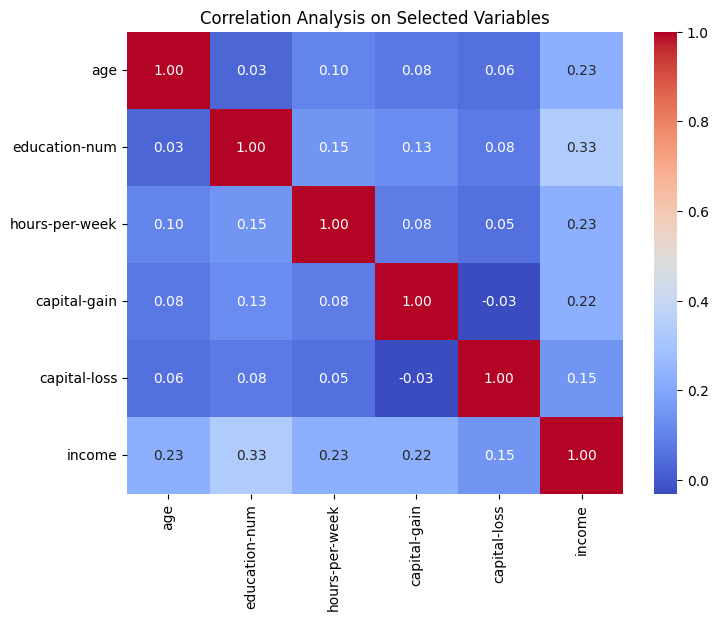

In [33]:
# Answer task 1 using this cell
## 1. Do correlation analysis on selected variables
cols = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']
corr_matrix = df[cols].corr()

print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Analysis on Selected Variables")
plt.show()

In [ ]:
# Berdasarkan hasil analisis korelasi, diperoleh informasi sebagai berikut:
# 1. Capital-gain memiliki korelasi positif paling kuat dengan income.
#    Individu dengan capital gain yang tinggi jauh lebih mungkin memiliki pendapatan >50K.
# 2. Education-num juga menunjukkan korelasi positif yang cukup kuat dengan income.
#    Tingkat pendidikan yang lebih tinggi berhubungan dengan pendapatan yang lebih besar.
# 3. Hours-per-week memiliki korelasi positif yang jelas dengan income.
#    Orang yang bekerja lebih lama cenderung memiliki pendapatan yang lebih tinggi.
#4. Age menunjukkan korelasi positif sedang dengan income.
#   Individu yang lebih tua sedikit lebih mungkin memiliki pendapatan tinggi dibanding yang lebih muda.
#5. Capital-loss menunjukkan korelasi yang sangat lemah dengan income.
#   Variabel ini hampir tidak memberikan kekuatan prediktif terhadap perbedaan pendapatan.

# Kesimpulan:
# - Prediktor yang paling informatif untuk income adalah capital-gain, education-num,
#   dan hours-per-week.
# - Age berkontribusi secara moderat, sedangkan capital-loss hampir tidak berpengaruh.


# Part 5 - Preprocessing on MNIST Dataset

In this part, you need to perform EDA and simple preprocessing on MNIST dataset. This dataset contain images of handwritten digit from 0 to 9. A pre configuration is provided to help you to load the data and inspect some images.

Hints:
1. You only need to use the **Test** set.
2. You need to perform to all of images in test set (10k images). You may need a function to complete this task (optional).

In [34]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


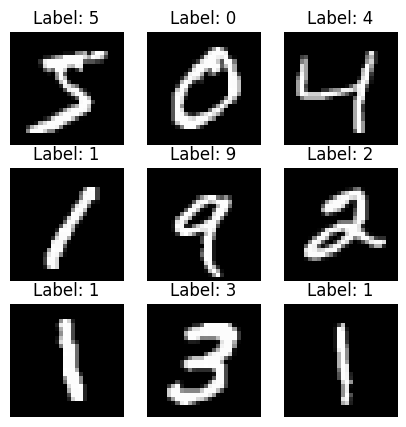

In [35]:
# Visual Inspection
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

Distribusi label pada test set: {np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}


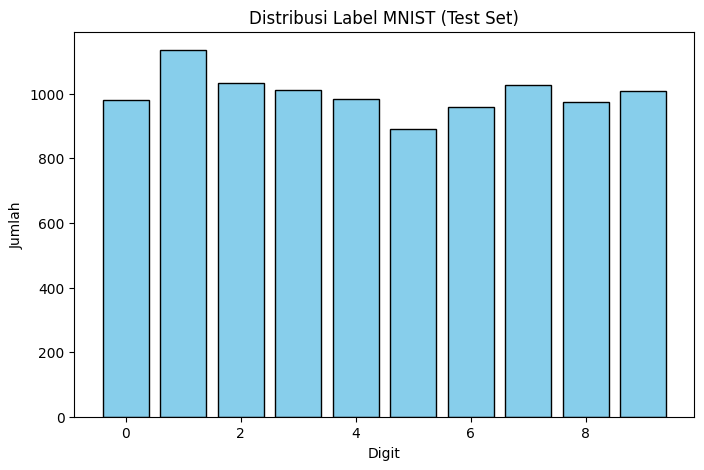

In [36]:
# Distirbusi Label (EDA)
unique, counts = np.unique(y_test, return_counts=True)
label_distribution = dict(zip(unique, counts))
print("Distribusi label pada test set:", label_distribution)

# Visualisasi distribusi label
plt.figure(figsize=(8,5))
plt.bar(unique, counts, color="skyblue", edgecolor="black")
plt.title("Distribusi Label MNIST (Test Set)")
plt.xlabel("Digit")
plt.ylabel("Jumlah")
plt.show()


In [39]:
# Preprocessing
# Flatten gambar 28x28 menjadi 784 (untuk model ML klasik)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

print("Shape setelah flatten:", X_test_flat.shape)  # (10000, 784)

Shape setelah flatten: (10000, 784)


Shape after upsampling: (10000, 32, 32)


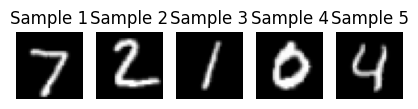

In [40]:
from skimage.transform import resize
import matplotlib.pyplot as plt

# Function to upsample an image
def upsample_image(image, new_shape):
    return resize(image, new_shape, anti_aliasing=True)

# Upsample all images in the test set
X_test_upsampled = np.array([upsample_image(img, (32, 32)) for img in X_test_norm])

print("Shape after upsampling:", X_test_upsampled.shape)

# Show 5 sample images after upsampling
plt.figure(figsize=(5,5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Sample {i+1}")
    plt.axis("off")
plt.show()

## Task 1 (10 points)
1. Perform **upsampling** on the images to 32x32
2. Show the 5 sample of the result.


Hint: You need to store the result in an empty array. Replacing data to the  **X_test** cannot be done due to the shape of the array (10000, (28,28)). You need to create an array which match with the size of the new images.

In [44]:
# Answer task 1 using this cell
from tensorflow.image import resize
import tensorflow as tf

# Buat array kosong (10000, 32, 32)
X_test_upsampled = np.zeros((X_test.shape[0], 32, 32))

# Loop setiap gambar dan lakukan resize
for i in range(X_test.shape[0]):
    # Konversi ke tensor lalu resize ke (32, 32)
    img_resized = resize(tf.convert_to_tensor(X_test[i][..., np.newaxis]), (32, 32))
    # Simpan hasil resize (squeeze untuk hilangkan channel dimensi tambahan)
    X_test_upsampled[i] = tf.squeeze(img_resized).numpy()




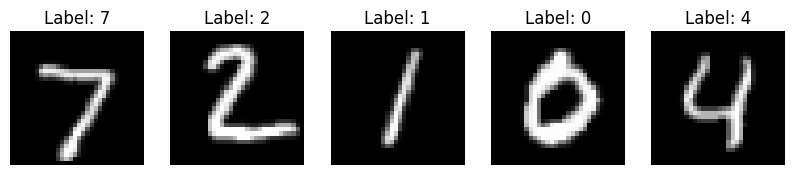

Shape asli: (10000, 28, 28)
Shape setelah upsampling: (10000, 32, 32)


In [45]:
# 2. Show the 5 sample pf the result
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test_upsampled[i], cmap="gray")
    plt.title(f"Label: {y_test[i]}")
    plt.axis("off")
plt.show()

print("Shape asli:", X_test.shape)
print("Shape setelah upsampling:", X_test_upsampled.shape)



## Task 2 (10 points)
Perform normalization, so the pixel value will have a value in range of 0 until 1

In [46]:
# Normalisasi hasil upsampling
X_test_norm = X_test_upsampled.astype("float32") / 255.0

# Cek hasil normalisasi
print("Sebelum normalisasi -> min:", X_test_upsampled.min(), ", max:", X_test_upsampled.max())
print("Sesudah normalisasi -> min:", X_test_norm.min(), ", max:", X_test_norm.max())


Sebelum normalisasi -> min: 0.0 , max: 255.0
Sesudah normalisasi -> min: 0.0 , max: 1.0


## Task 3 (10 points)
Transform / reshape the images into 1 dimensional array. Do it to the all images (after resizing and normalization).

Hint: You may need an empty array to store the result

In [47]:
# Buat array kosong untuk menyimpan hasil flatten
X_test_flat = np.zeros((X_test_norm.shape[0], 32*32))

# Loop setiap gambar dan reshape ke 1D
for i in range(X_test_norm.shape[0]):
    X_test_flat[i] = X_test_norm[i].reshape(-1)

# Cek shape hasil flatten
print("Shape sebelum flatten:", X_test_norm.shape)
print("Shape setelah flatten:", X_test_flat.shape)

Shape sebelum flatten: (10000, 32, 32)
Shape setelah flatten: (10000, 1024)
